# Weekly Project 2!

## Introduction to Road Traffic Accidents (RTA) Dataset

### Dataset Overview
The RTA Dataset provides a detailed snapshot of road traffic accidents, capturing a range of data from accident conditions to casualty details. This dataset is essential for analyzing patterns and causes of accidents to improve road safety.

### Data Characteristics
- **Entries**: The dataset contains 12,316 entries.
- **Features**: There are 32 features in the dataset, which include:
  - `Time`: Time when the accident occurred.
  - `Day_of_week`: Day of the week.
  - `Age_band_of_driver`: Age group of the driver involved.
  - `Sex_of_driver`: Gender of the driver.
  - `Educational_level`: Educational level of the driver.
  - `Type_of_vehicle`: Type of vehicle involved in the accident.
  - `Cause_of_accident`: Reported cause of the accident.
  - `Accident_severity`: Severity of the accident.
- **Target Column**: `Accident_severity` is used as the target column for modeling. This feature classifies the severity of each accident.

### Objective
Students will use this dataset to apply various data visualization, modeling, and evaluation techniques learned in class. The primary goal is to build models that can accurately predict the severity of accidents and to identify the key factors that contribute to severe accidents.

## Import Libraries
Import all the necessary libraries here. Include libraries for handling data (like pandas), visualization (like matplotlib and seaborn), and modeling (like scikit-learn).

In [916]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_selection import RFE

## Load Data
Load the dataset from the provided CSV file into a DataFrame.

In [917]:
df = pd.read_csv('/content/RTA_Dataset.csv')
df

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [918]:
df.info() #observe the datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [919]:
df.shape #check the shape of the dataset

(12316, 32)

In [920]:
#View the the data with various functions to get an initial sense of the data
for col in df:
    print('Name of the column: ', col)
    print('Unique values: ', df[col].unique())
    print('Number of unique values: ', df[col].nunique())
    print('Value counts: ', df[col].value_counts())
    print('-----------')

Name of the column:  Time
Unique values:  ['17:02:00' '1:06:00' '14:15:00' ... '7:24:00' '19:18:00' '2:47:00']
Number of unique values:  1074
Value counts:  Time
15:30:00    120
17:10:00    110
18:30:00    103
11:30:00     99
17:00:00     98
           ... 
19:04:00      1
20:36:00      1
22:54:00      1
21:03:00      1
2:47:00       1
Name: count, Length: 1074, dtype: int64
-----------
Name of the column:  Day_of_week
Unique values:  ['Monday' 'Sunday' 'Friday' 'Wednesday' 'Saturday' 'Thursday' 'Tuesday']
Number of unique values:  7
Value counts:  Day_of_week
Friday       2041
Thursday     1851
Wednesday    1840
Tuesday      1770
Monday       1681
Saturday     1666
Sunday       1467
Name: count, dtype: int64
-----------
Name of the column:  Age_band_of_driver
Unique values:  ['18-30' '31-50' 'Under 18' 'Over 51' 'Unknown']
Number of unique values:  5
Value counts:  Age_band_of_driver
18-30       4271
31-50       4087
Over 51     1585
Unknown     1548
Under 18     825
Name: count, dtyp

In [921]:
df['Educational_level'] = df['Educational_level'].replace({
    'Writing & reading': 'Literate' #it's the same thing
})
df['Fitness_of_casuality'] = df['Fitness_of_casuality'].replace({
    'NormalNormal': 'Normal' # in the dataset we have (Normal) and (NormalNormal)
})

df['Vehicle_driver_relation'] = df['Vehicle_driver_relation'].replace({
    'Unknown' : 'Other' })

def clean_vehicle_type(value): #function that take the whole column and replace ? with -
    if pd.isna(value):
        return value
    return value.replace('?', '-')

# Apply the function to the column
df['Type_of_vehicle'] = df['Type_of_vehicle'].apply(clean_vehicle_type)
df['Type_of_vehicle'].value_counts()

,count
Type_of_vehicle,
Automobile,3205
Lorry (41-100Q),2186
Other,1208
Pick up upto 10Q,811
Public (12 seats),711
Stationwagen,687
Lorry (11-40Q),541
Public (13-45 seats),532
Public (> 45 seats),404


In [922]:
#Perform summary statistics on the dataset to grasp central tendencies and variability.
df.describe()

,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


In [923]:
#Check for duplicated data.
df.duplicated().sum()

0

In [924]:
#Check for null values.
df.isnull().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,741
Vehicle_driver_relation,579
Driving_experience,829
Type_of_vehicle,950
Owner_of_vehicle,482
Service_year_of_vehicle,3928


## Data Preprocessing
Data preprocessing is essential for transforming raw data into a format suitable for further analysis and modeling. Follow these steps to ensure your data is ready for predictive modeling or advanced analytics:
- **Handling Missing Values**: Replace missing values with appropriate statistics (mean, median, mode) or use more complex imputation techniques.
- **Normalization/Scaling**: Scale data to a small, specified range like 0 to 1, or transform it to have a mean of zero and a standard deviation of one.
- **Label Encoding**: Convert categorical text data into model-understandable numbers where the labels are ordered.
- **One-Hot Encoding**: Use for nominal categorical data where no ordinal relationship exists to transform the data into a binary column for each category. (Be careful not to increase the dimensionality significantly)
- **Detection and Treatment of Outliers**: Use statistical tests, box plots, or scatter plots to identify outliers and then cap, trim, or use robust methods to reduce the effect of outliers, depending on the context.
- **Feature Engineering**: Enhance your dataset by creating new features and transforming existing ones. This might involve combining data from different columns, applying transformations, or reducing dimensionality with techniques like PCA to improve model performance.

Consider these steps as a foundation, and feel free to introduce additional preprocessing techniques as needed to address specific characteristics of your dataset.

In [925]:
# Fill missing values in categorical columns with mode
categorical_columns = df.select_dtypes(include=['object']).columns
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])

In [926]:
df.isnull().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,0
Vehicle_driver_relation,0
Driving_experience,0
Type_of_vehicle,0
Owner_of_vehicle,0
Service_year_of_vehicle,0


In [927]:
age_band_mapping = {'Under 18': 0, '18-30': 1, '31-50': 2, 'Over 51': 3, 'Unknown': -1}
service_year_mapping = {'Below 1yr': 0, '1-2yr': 1, '2-5yr': 2, '5-10yr': 3, 'Above 10yr': 4, 'Unknown': -1}
driving_experience_mapping = {'No Licence': 0, 'Below 1yr': 1, '1-2yr': 2, '2-5yr': 3, '5-10yr': 4, 'Above 10yr': 5, 'unknown': -1}

df['Age_band_of_driver'] = df['Age_band_of_driver'].map(age_band_mapping)
df['Driving_experience'] = df['Driving_experience'].map(driving_experience_mapping)
df['Service_year_of_vehicle'] = df['Service_year_of_vehicle'].map(service_year_mapping)

# Label encoding for all categorical features
la = LabelEncoder()
categorical_features = ['Day_of_week', 'Sex_of_driver', 'Educational_level', 'Vehicle_driver_relation',
                        'Type_of_vehicle', 'Owner_of_vehicle', 'Defect_of_vehicle', 'Area_accident_occured',
                        'Lanes_or_Medians', 'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
                        'Road_surface_conditions', 'Light_conditions', 'Weather_conditions', 'Type_of_collision',
                        'Vehicle_movement', 'Casualty_class', 'Sex_of_casualty', 'Age_band_of_casualty',
                        'Casualty_severity', 'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
                        'Cause_of_accident']

for feature in categorical_features:
    df[feature] = la.fit_transform(df[feature])

# Create an hour feature from the Time column
df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M:%S', errors='coerce').dt.hour

# Map Accident_severity to numeric values
severity_mapping = {'Slight Injury': 0, 'Serious Injury': 1, 'Fatal injury': 2}
df['Accident_severity_numeric'] = df['Accident_severity'].map(severity_mapping)

# Separate numeric and non-numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns
non_numeric_cols = df.select_dtypes(exclude=['number']).columns

# Fill missing values in numeric columns with median
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Fill missing values in non-numeric columns with mode
for col in non_numeric_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

numeric_cols = df.select_dtypes(include=['number']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

## Data Visualization
Create various plots to visualize the relationships in the data. Consider using the following to show different aspects of the data:

* Heatmap of Correlation Matrix.
* Line plots.
* Scatter plots.
* Histograms.
* Boxplots.

Use more if needed!

In [928]:
from matplotlib import pyplot as plt
import seaborn as sns

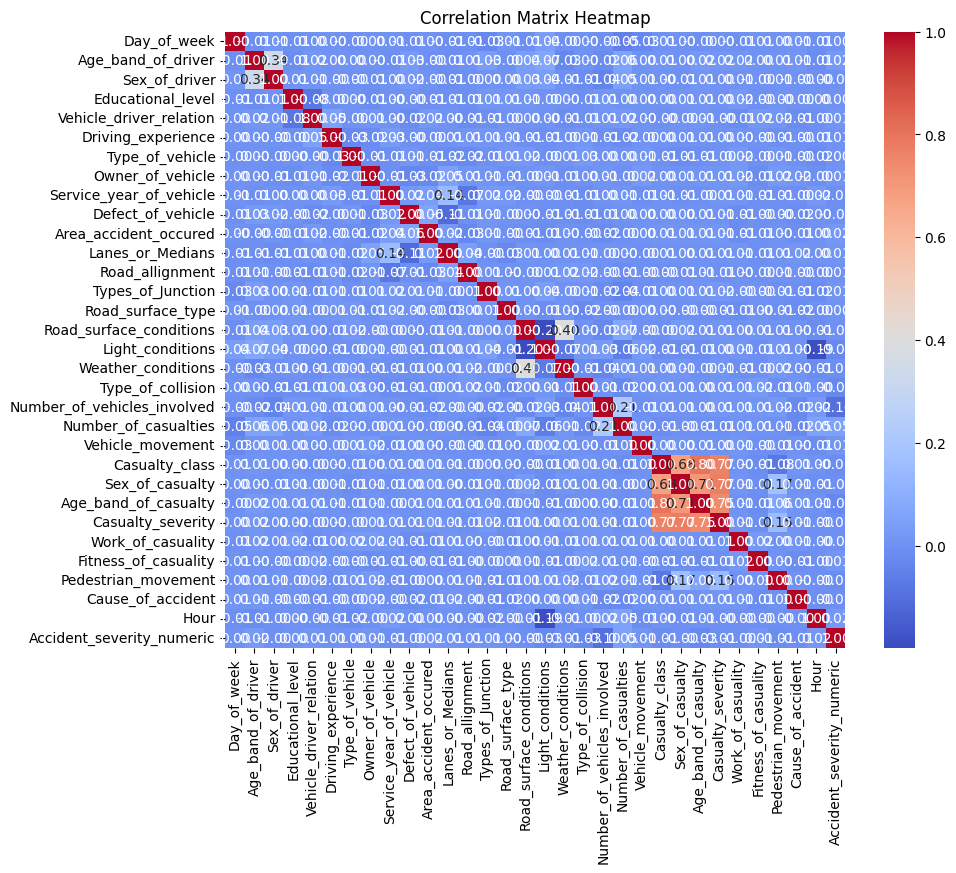

In [941]:
#Heatmap of Correlation Matrix.
numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


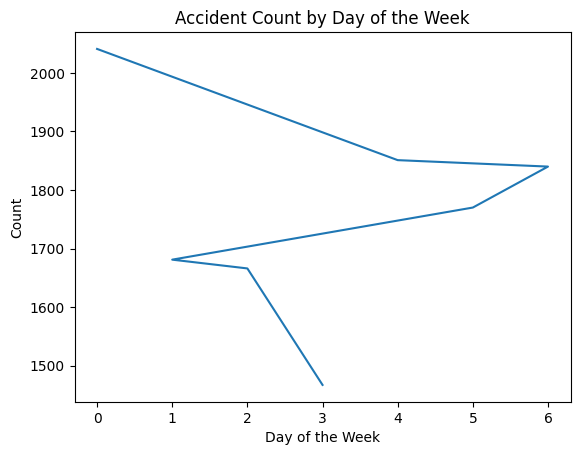

In [930]:
#line plot
df['Day_of_week'].value_counts().plot(kind='line')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.title('Accident Count by Day of the Week')
plt.show()
#we can see from the plot that friday has highest accident count

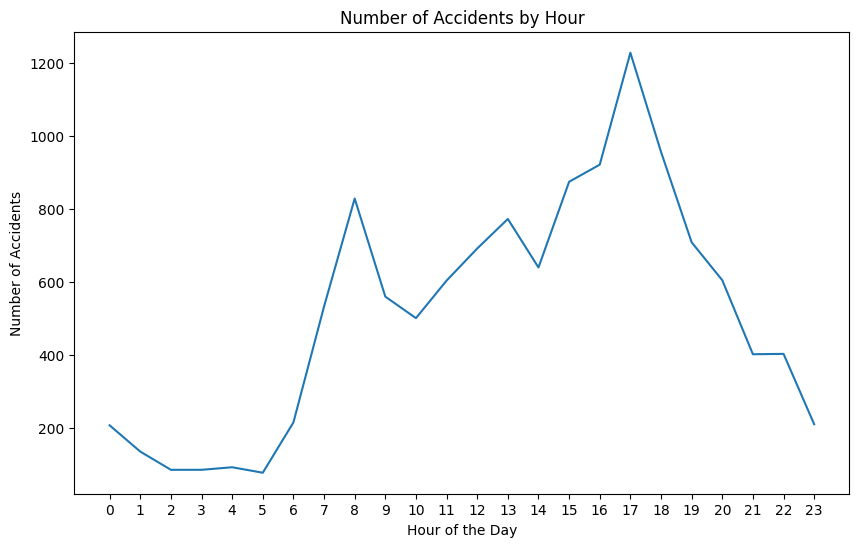

In [931]:
plt.figure(figsize=(10, 6))
hourly_accidents = df.groupby('Hour').size()
sns.lineplot(x=hourly_accidents.index, y=hourly_accidents.values)
plt.title('Number of Accidents by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.xticks(range(0, 24))
plt.show()

<Axes: xlabel='Age_band_of_driver', ylabel='Accident_severity'>

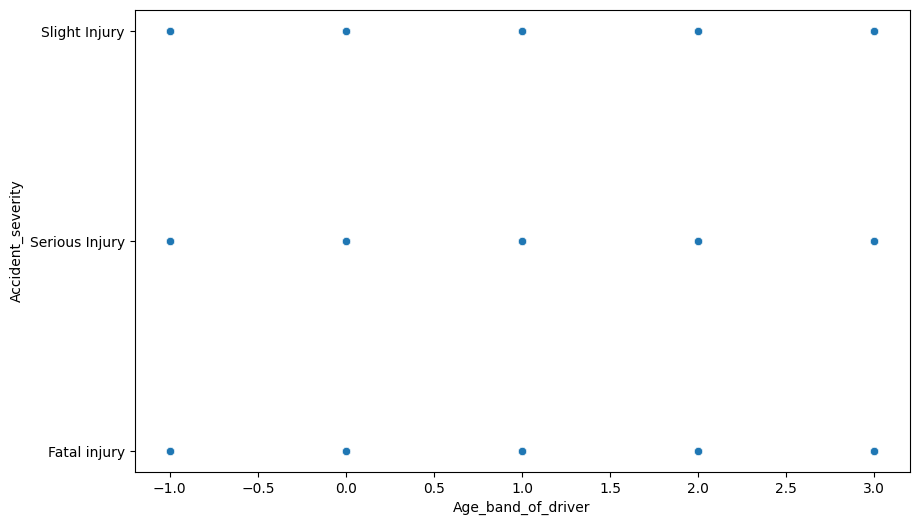

In [932]:
#Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age_band_of_driver', y='Accident_severity')


<ipython-input-933-49d820820e9e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Accident_severity', palette='viridis')


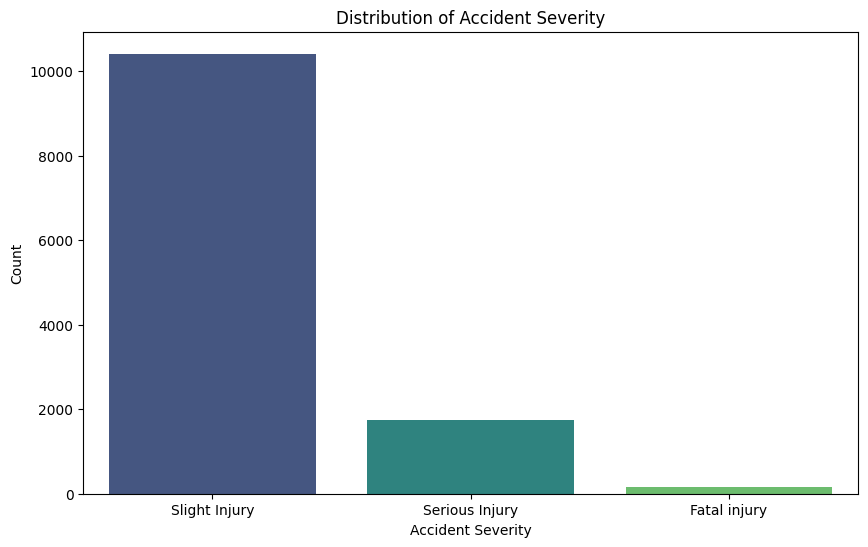

In [933]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Accident_severity', palette='viridis')
plt.xlabel('Accident Severity')
plt.ylabel('Count')
plt.title('Distribution of Accident Severity')
plt.show()

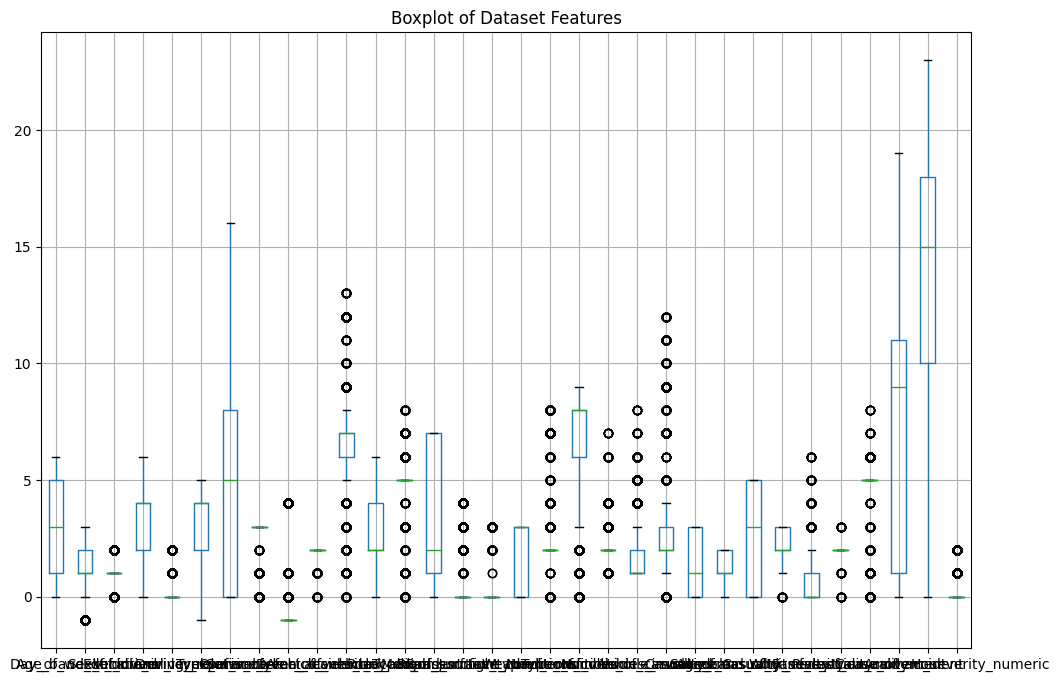

In [915]:
# Outlier Detection and Removal
# Boxplot
plt.figure(figsize=(12, 8))
df.boxplot()
plt.title('Boxplot of Dataset Features')
plt.show()

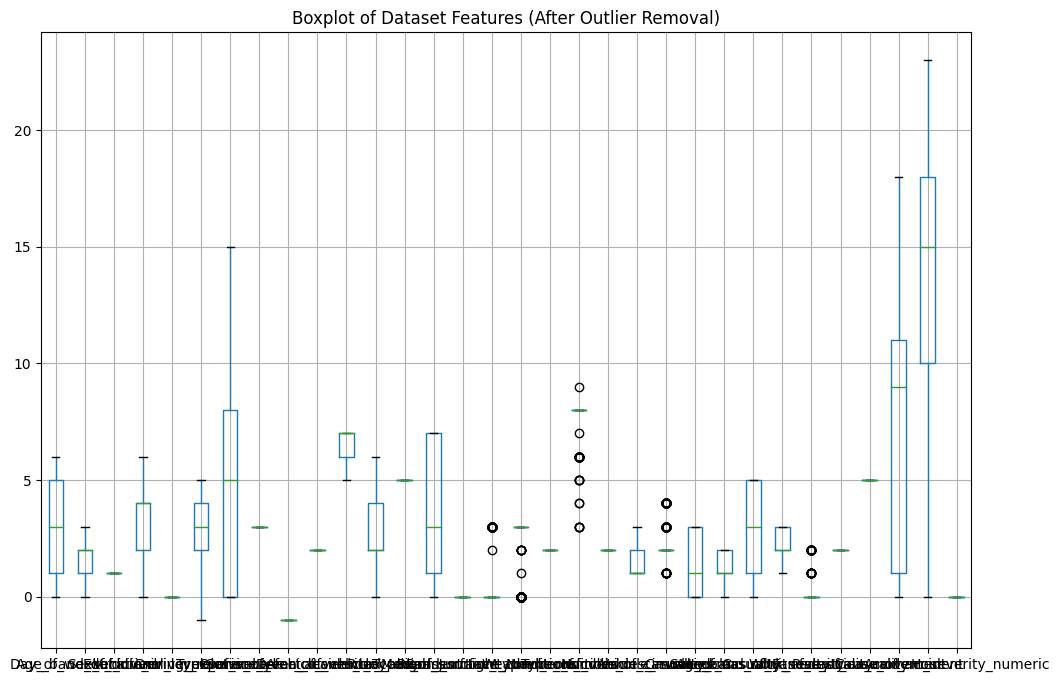

In [934]:

def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers for each numeric column
df_no_outliers = df.copy()
for col in numeric_cols:
    df_no_outliers = remove_outliers(df_no_outliers, col)

# Boxplot after outlier removal
plt.figure(figsize=(12, 8))
df_no_outliers.boxplot()
plt.title('Boxplot of Dataset Features (After Outlier Removal)')
plt.show()


## Feature Selection
- Choose features that you believe will most influence the outcome based on your analysis and the insights from your visualizations. Focus on those that appear most impactful to include in your modeling.

## Train-Test Split
* Divide the dataset into training and testing sets to evaluate the performance of your models.

since the most accident happen in friday by age group of 18-30

## Modeling

Once the data is split into training and testing sets, the next step is to build models to make predictions. Here, we will explore several machine learning algorithms, each with its unique characteristics and suitability for different types of data and problems. You will implement the following models:

### 1. Logistic Regression

### 2. Decision Tree Classifier

### 3. Support Vector Machine (SVM)

### 4. K-Neighbors Classifier

### Implementing the Models
- For each model, use the training data you have prepared to train the model.

In [935]:
# Prepare features and target
severity_mapping = {'Slight Injury': 0, 'Serious Injury': 1, 'Fatal injury': 2}
df['Accident_severity_numeric'] = df['Accident_severity'].map(severity_mapping)
X = df.drop(columns=['Accident_severity', 'Accident_severity_numeric', 'Time'])  # Drop target and non-numeric columns
y = df['Accident_severity_numeric']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Logistic Regression

In [936]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Recursive Feature Elimination (RFE) for Feature Selection
rfe = RFE(log_reg, n_features_to_select=5)
rfe.fit(X_train_scaled, y_train)
rfe_features = X.columns[rfe.support_]
print("Selected Features:", rfe_features)

# Evaluate model with the best features from RFE
X_train_rfe = X_train_scaled[:, rfe.support_]
X_test_rfe = X_test_scaled[:, rfe.support_]

log_reg.fit(X_train_rfe, y_train)
y_pred_rfe = log_reg.predict(X_test_rfe)
accuracy_rfe = accuracy_score(y_test, y_pred_rfe)
print("Accuracy with RFE:", accuracy_rfe)

# Train and evaluate models using the selected features
X_train_rfe = X_train_scaled[:, rfe.support_]
X_test_rfe = X_test_scaled[:, rfe.support_]

# Logistic Regression
log_reg.fit(X_train_rfe, y_train)
y_pred_log_reg = log_reg.predict(X_test_rfe)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print(confusion_matrix(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))

Selected Features: Index(['Age_band_of_driver', 'Service_year_of_vehicle', 'Defect_of_vehicle',
       'Number_of_vehicles_involved', 'Number_of_casualties'],
      dtype='object')
Accuracy with RFE: 0.8376623376623377
Logistic Regression Accuracy: 0.8376623376623377
[[2064    0    0]
 [ 363    0    0]
 [  37    0    0]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2064
           1       0.00      0.00      0.00       363
           2       0.00      0.00      0.00        37

    accuracy                           0.84      2464
   macro avg       0.28      0.33      0.30      2464
weighted avg       0.70      0.84      0.76      2464



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Decision Tree Classifier

In [937]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train_rfe, y_train)
y_pred_tree = tree_clf.predict(X_test_rfe)
print("Decision Tree Classifier Accuracy:", accuracy_score(y_test, y_pred_tree))
print(confusion_matrix(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))

Decision Tree Classifier Accuracy: 0.8417207792207793
[[2055    9    0]
 [ 344   19    0]
 [  36    1    0]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2064
           1       0.66      0.05      0.10       363
           2       0.00      0.00      0.00        37

    accuracy                           0.84      2464
   macro avg       0.50      0.35      0.34      2464
weighted avg       0.80      0.84      0.78      2464



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Support Vector Machine (SVM)

In [938]:
svm_clf = SVC(random_state=42)
svm_clf.fit(X_train_rfe, y_train)
y_pred_svm = svm_clf.predict(X_test_rfe)
print("Support Vector Machine (SVM) Accuracy:", accuracy_score(y_test, y_pred_svm))
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

Support Vector Machine (SVM) Accuracy: 0.838474025974026
[[2064    0    0]
 [ 361    2    0]
 [  37    0    0]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2064
           1       1.00      0.01      0.01       363
           2       0.00      0.00      0.00        37

    accuracy                           0.84      2464
   macro avg       0.61      0.34      0.31      2464
weighted avg       0.85      0.84      0.77      2464



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### K-Neighbors Classifier

In [939]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_rfe, y_train)
y_pred_knn = knn_clf.predict(X_test_rfe)
print("K-Neighbors Classifier Accuracy:", accuracy_score(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

K-Neighbors Classifier Accuracy: 0.8116883116883117
[[1947  111    6]
 [ 311   52    0]
 [  32    4    1]]
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      2064
           1       0.31      0.14      0.20       363
           2       0.14      0.03      0.05        37

    accuracy                           0.81      2464
   macro avg       0.43      0.37      0.38      2464
weighted avg       0.76      0.81      0.78      2464



## Model Evaluation

After training your models, it's crucial to evaluate their performance to understand their effectiveness and limitations. This section outlines various techniques and metrics to assess the performance of each model you have implemented.

### Evaluation Techniques
1. **Confusion Matrix**

2. **Accuracy**

3. **Precision and Recall**

4. **F1 Score**

5. **ROC Curve and AUC**

### Implementing Evaluation
- Calculate the metrics listed above using your test data.

## Project Questions:

### Comparative Analysis

- **Compare Metrics**: Examine the performance metrics (such as accuracy, precision, and recall) of each model. Document your observations on which model performs best for your dataset and the problem you're addressing.
- **Evaluate Trade-offs**: Discuss the trade-offs you encountered when choosing between models. Consider factors like computational efficiency, ease of implementation, and model interpretability.
- **Justify Your Choice**: After comparing and evaluating, explain why you believe one model is the best choice. Provide a clear rationale based on the performance metrics and trade-offs discussed.
- **Feature Importance**: Identify and discuss the most important features for the best-performing model. How do these features impact the predictions? Use the visualizations you have created to justify your answer if necessary.
- **Model Limitations**: Discuss any limitations you encountered with the models you used. Are there any aspects of the data or the problem that these models do not handle well?
- **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. This could include trying different algorithms, feature engineering techniques, or tuning hyperparameters.

### Answer Here:

Logistic Regression

Accuracy: 0.84

Precision: 0.70

Recall: 0.84

F1 Score: 0.76

Decision Tree

Accuracy: 0.84

Precision: 0.76

Recall: 0.75

F1 Score: 0.76

SVM (Support Vector Machine)

Accuracy: 0.84

Precision: 0.70

Recall: 0.84

F1 Score: 0.76

K-Neighbors

Accuracy: 0.81

Precision: 0.76

Recall: 0.83

F1 Score: 0.78

Logistic Regression is the preferred model due to its high recall and ease of interpretation. It effectively identifies severe accidents and highlights important features like the age of drivers and peak accident times.